In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from random import choice
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
data0=pd.read_csv("input/TrainMyriad.csv")
data0.head()

,0,1,2,3,4,5,6,7,8,9,...,244,245,246,247,248,249,250,251,252,Class
0,0.006353,0.012099,0.008836,0.006182,-0.029186,-0.020042,0.000000,-0.045210,0.011838,-0.033426,...,0.002667,-0.005319,-0.001604,-0.001071,-0.010724,0.012466,-0.014989,0.005978,-0.000540,1
1,0.008518,0.000000,0.006888,-0.017510,0.012682,0.007612,0.022258,-0.002622,0.001833,-0.004136,...,0.017926,-0.010008,0.013714,-0.037801,-0.004499,0.007586,-0.022667,0.025406,0.017743,1
2,-0.002749,-0.007983,-0.002683,-0.003074,-0.007709,-0.029132,-0.005001,-0.013168,0.000306,0.016701,...,-0.034084,-0.021786,0.009724,-0.002485,0.010277,-0.002466,-0.007417,-0.022416,0.013376,0
3,-0.006397,-0.008048,0.009736,-0.008437,0.019044,0.009145,0.012608,-0.008171,0.006669,0.003118,...,-0.005309,0.001001,-0.007331,0.001678,0.012064,-0.008609,-0.005344,-0.011081,-0.003056,0
4,-0.002278,-0.021309,0.004666,0.027090,0.026375,-0.028634,-0.009826,0.004580,0.003799,0.024981,...,-0.034297,-0.049443,-0.017582,-0.000746,0.019403,-0.010249,0.008136,-0.011005,0.007418,0


There are no NaN values

In [3]:
data0.isna().sum().sum()

0

Splitting the dataset into X0 and y0 dataset

In [4]:
X0=data0.drop(columns=["Class"])
y0=data0["Class"]

X0 has 5000 rows and 253 columns

In [5]:
X0.shape

(5000, 253)

We plot some random values of our dataset to check if we can spot some differences at first sight. (Obviusly we can't, we won't be doing Machine Learning if that was the case)

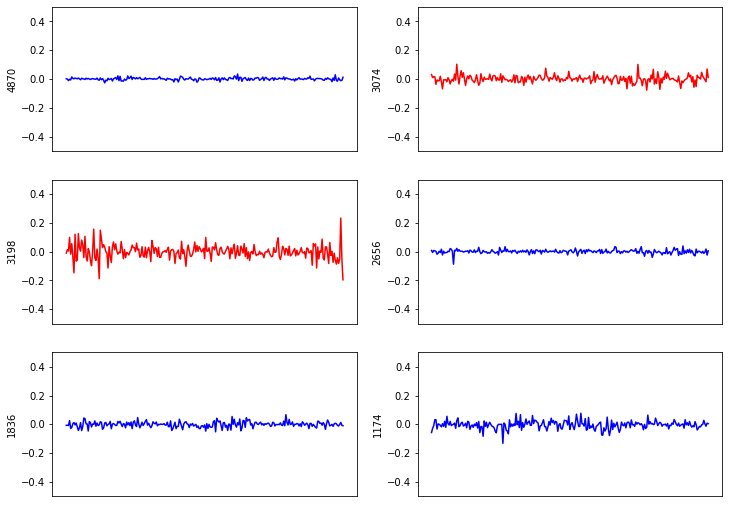

In [6]:
ts_index_plot=[choice(X0.index) for i in range(6)]

dict_colors={1:"red",0:"blue"}
fig, arr=plt.subplots(3,2, figsize=(12,9));
plt.setp(arr, ylim=[-0.5,0.5], xticks=[])
sns.lineplot(x=X0.columns, y=X0.iloc[ts_index_plot[0]], ax=arr[0,0], color=dict_colors[y0.iloc[ts_index_plot[0]]] );
sns.lineplot(x=X0.columns, y=X0.iloc[ts_index_plot[1]], ax=arr[1,0], color=dict_colors[y0.iloc[ts_index_plot[1]]] );
sns.lineplot(x=X0.columns, y=X0.iloc[ts_index_plot[2]], ax=arr[2,0], color=dict_colors[y0.iloc[ts_index_plot[2]]] );
sns.lineplot(x=X0.columns, y=X0.iloc[ts_index_plot[3]], ax=arr[0,1], color=dict_colors[y0.iloc[ts_index_plot[3]]] );
sns.lineplot(x=X0.columns, y=X0.iloc[ts_index_plot[4]], ax=arr[1,1], color=dict_colors[y0.iloc[ts_index_plot[4]]] );
sns.lineplot(x=X0.columns, y=X0.iloc[ts_index_plot[5]], ax=arr[2,1], color=dict_colors[y0.iloc[ts_index_plot[5]]] );


We check that synthetic and real time series are close in frequency so our model won't be biased.

In [7]:
y0.value_counts()

0    2553
1    2447
Name: Class, dtype: int64

Now we are going to try a simple Random Forest Classifier to check performance without further proccessing

In [8]:
X0_train,X0_test, y0_train,y0_test=train_test_split(X0,y0, train_size=0.8)

In [14]:
rfc=RandomForestClassifier(n_jobs=-1)
rfc.fit(X0_train,y0_train)
rfc.score(X0_test, y0_test)

0.522

So we see that we need to create more relevant features to obtain better predictions